In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

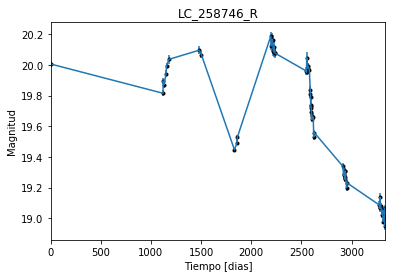

In [2]:
data = np.genfromtxt('LC_258746_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_258746_R')
plt.savefig("LC_258746_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

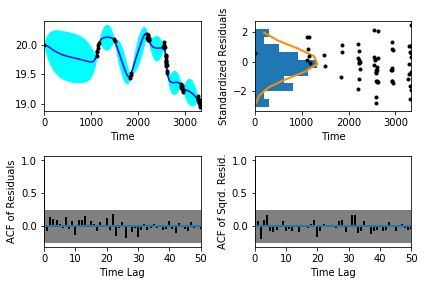

In [5]:
sample.assess_fit()

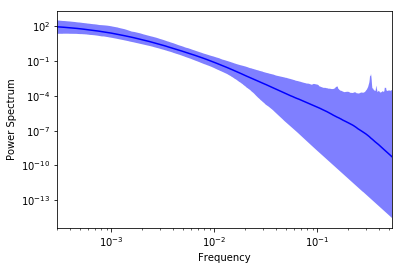

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

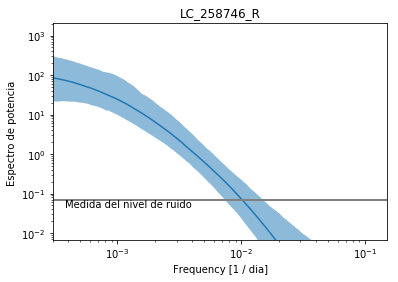

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_258746_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_258746_R')

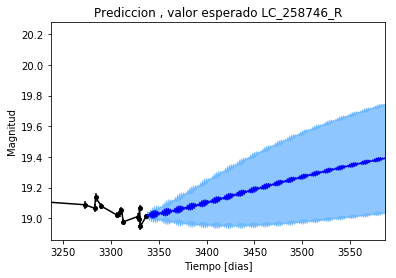

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_258746_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_258746_R')

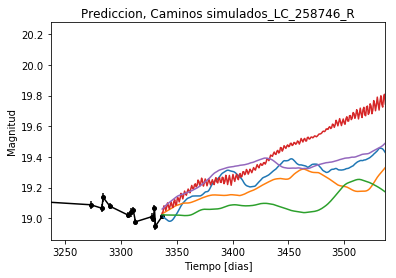

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_258746_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


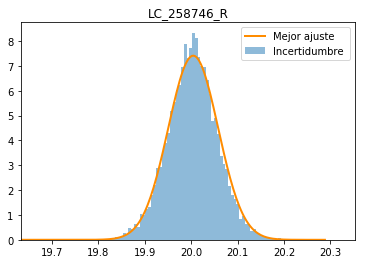

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_258746_R')
plt.savefig("Mejor_ajuste_LC_258746_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_258746_R')

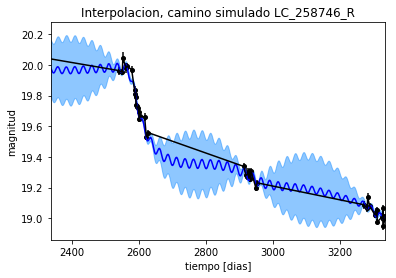

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_R')

Text(0.5,1,'Interpolacion, camino simulado LC_258746_R')

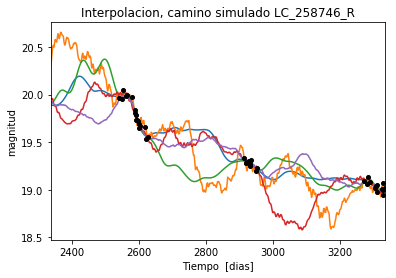

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 418.021851244
Median: 0.00877555202485
Standard deviation: 0.18954753999
68% credibility interval: [ 0.0007122  0.140207 ]
95% credibility interval: [  3.43860887e-04   7.51768596e-01]
99% credibility interval: [  3.14398036e-04   1.00220283e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 980.835400079
Median: 0.00252897404991
Standard deviation: 0.0598273745595
68% credibility interval: [ 0.00045387  0.01955488]
95% credibility interval: [ 0.00032223  0.15460389]
99% credibility interval: [  3.06694099e-04   4.19007815e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 394.410074104
Median: 0.00788459765685
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 176.832753788
Median: 106.811777563
Standard deviation: 2.43232670276
68% credibility interval: [ 104.71287339  108.81636669]
95% credibility interval: [ 102.14815075  112.39131283]
99% credibility interval: [  99.79741101  113.59691576]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 245.418344633
Median: 0.29120187734
Standard deviation: 2.10728643055
68% credibility interval: [ 0.05040088  3.29264251]
95% credibility interval: [ 0.01992183  7.25207546]
99% credibility interval: [  0.0144698   10.00566354]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 307.341121514
Median: 1.88236144006
Standard deviation: 8.86718814973
68% credibility interval: [  0.11067554  11.80578112]
95% credibility interval: [  8.19164862e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1907.93894971
Median: 6.04574713142e-35
Standard deviation: 1.96115203326e+50
68% credibility interval: [  5.91609974e-102   3.15551966e+000]
95% credibility interval: [  1.00901390e-220   6.35367491e+044]
99% credibility interval: [  2.88539421e-248   4.15214261e+048]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2415.8413512
Median: 19.69855103
Standard deviation: 0.206307356829
68% credibility interval: [ 19.50677534  19.87392722]
95% credibility interval: [ 19.28398621  20.11585745]
99% credibility interval: [ 19.06181839  20.32584131]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 180.254754163
Median: 0.113189560834
Standard deviation: 0.264159424968
68% credibility interval: [ 0.         0.4989944]
95% credibility interval: [ 0.          0.91390219]
99% credibility interval: [ 0.          1.03253521]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 180.254754163
Median: 0.113189560834
Standard deviation: 0.264159424968
68% credibility interval: [ 0.         0.4989944]
95% credibility interval: [ 0.          0.91390219]
99% credibility interval: [ 0.          1.03253521]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2675.33561279
Median: 0.0
Standard deviation: 0.000372641481963
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 176.832753788
Median: 106.811777563
Standard deviation: 2.43232670276
68% credibility interval: [ 104.71287339  108.81636669]
95% credibility interval: [ 102.14815075  112.39131283]
99% credibility interval: [  99.79741101  113.59691576]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2605.36448332
Median: 0.178184581231
Standard deviation: 0.157799036948
68% credibility interval: [ 0.11004835  0.31199846]
95% credibility interval: [ 0.07622932  0.55754213]
99% credibility interval: [ 0.06119439  0.98361064]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 203.645683159
Median: 1.43438496008
Standard deviation: 0.255939146452
68% credibility interval: [ 1.17052405  1.6893397 ]
95% credibility interval: [ 0.88690751  1.90531836]
99% credibility interval: [ 0.79730294  1.97950086]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2101.05688066
Median: 0.00221878010496
Standard deviation: 0.0734917994612
68% credibility interval: [ 0.00010876  0.01657588]
95% credibility interval: [  5.49409937e-48   8.81748351e-02]
99% credibility interval: [  2.13804001e-52   2.78074303e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 418.021851244
Median: (-0.0551384195449-0.0274303913235j)
Standard deviation: 2.04284193973
68% credibility interval: [-0.88094654-3.27927157j -0.00447486-0.97021463j]
95% credibility interval: [ -4.72350140e+00+0.j          -2.16054167e-03-2.34342847j]
99% credibility interval: [ -6.29702607e+00+0.j          -1.97542112e-03-1.86268658j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 980.835400079
Median: (-0.0158900125926+2.50462985448j)
Standard deviation: 1.70179835159
68% credibility interval: [-0.12286692+0.58051272j -0.00285177+0.j        ]
95% credibility interval: [-0.97140488+4.87267087j -0.00202460+4.19093791j]
99% credibility interval: [ -2.63270375e+00+5.60418367j  -1.92701586e-03+0.j        ]
Posterior su